In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import requests

# Load datasets from Google Drive
pak_id = '1XF94FVGJ2HfInS2jb-JlEUH1JJ2fwupB'
cal_id = '1a9AluzgGh8wrV8eGrHl0dBxMpsMnkZiw'
chi_id = '1Lkp0W-DNPQPr01F2p9WWQH9fXLgNT8pQ'

# Create URLs
pak_url = f'https://drive.google.com/uc?id={pak_id}'
cal_url = f'https://drive.google.com/uc?id={cal_id}'
chi_url = f'https://drive.google.com/uc?id={chi_id}'

# Load datasets
chile = pd.read_csv(chi_url, sep='\t')
cali = pd.read_csv(cal_url, sep='\t')
pak = pd.read_csv(pak_url, sep='\t')

# Merge datasets
eq = pd.concat([chile, cali, pak], ignore_index=True)

# See unique labels and their counts
label_distribution = eq['label'].value_counts()
print("\nLabel distribution:")
print(label_distribution)


# Create label mappings
unique_labels = sorted(eq['label'].unique())
label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
idx_to_label = {idx: label for label, idx in label_to_idx.items()}

# Convert string labels to indices
eq['label_idx'] = eq['label'].map(label_to_idx)


Label distribution:
label
other_useful_information                             2211
not_related_or_irrelevant                             760
sympathy_and_emotional_support                        690
injured_or_dead_people                                625
caution_and_advice                                    387
donation_needs_or_offers_or_volunteering_services     386
infrastructure_and_utilities_damage                   359
displaced_people_and_evacuations                       79
missing_trapped_or_found_people                        17
Name: count, dtype: int64


In [ ]:
print("\nLabel conversion check:")
print("Original labels first few:", eq['label'].head())
print("Converted labels first few:", eq['label_idx'].head())
print("Unique converted labels:", np.unique(eq['label_idx']))


Label conversion check:
Original labels first few: 0    sympathy_and_emotional_support
1         not_related_or_irrelevant
2         not_related_or_irrelevant
3    sympathy_and_emotional_support
4            injured_or_dead_people
Name: label, dtype: object
Converted labels first few: 0    8
1    6
2    6
3    8
4    4
Name: label_idx, dtype: int64
Unique converted labels: [0 1 2 3 4 5 6 7 8]


In [ ]:
def load_pretrained_embeddings(embeddings_id):
    url = f'https://drive.google.com/uc?id={embeddings_id}'
    vocab = {}
    embeddings = []

    print("Loading embeddings...")
    response = requests.get(url)
    content = response.text.splitlines()

    # First line contains vocab_size and dimension
    vocab_size, dim = map(int, content[0].strip().split())
    print(f"Expected vocab size: {vocab_size}, dimensions: {dim}")

    # Process remaining lines
    for idx, line in enumerate(tqdm(content[1:], total=vocab_size)):
        parts = line.strip().split()
        if len(parts) <= 1:
            continue
        word = parts[0].lower()  # Convert to lowercase as in original code
        vector = list(map(float, parts[1:]))

        vocab[word] = idx
        embeddings.append(vector)

    embeddings = torch.FloatTensor(embeddings)
    print(f"Loaded {len(vocab)} words with embedding dim {dim}")
    return vocab, embeddings

embeddings_id = '1205jvq6B0XFsqLn_GNnF57sVBXAlcCsR'
vocab, pretrained_embeddings = load_pretrained_embeddings(embeddings_id)

Loading embeddings...
Expected vocab size: 20732, dimensions: 300


100%|██████████| 20732/20732 [00:01<00:00, 13333.57it/s]


Loaded 20726 words with embedding dim 300


Starting main process...

Original class distribution:
Counter({7: 1769, 6: 608, 8: 552, 4: 500, 0: 309, 2: 309, 3: 287, 1: 63, 5: 14})

Preparing data for SMOTE...

Applying SMOTE...

Resampled class distribution:
Counter({7: 1769, 6: 608, 8: 552, 0: 500, 2: 500, 3: 500, 4: 500, 1: 100, 5: 50})

Dataset initialization:
Labels type: <class 'numpy.ndarray'>
First few labels: [7 7 0 6 7]

Dataset initialization:
Labels type: <class 'numpy.ndarray'>
First few labels: [0 6 7 6 7]
Using device: cpu

Starting training...

Epoch 1/5

First batch performance at epoch start:
Loss: 2.2543
Accuracy: 0.00%


Training:   0%|          | 0/159 [00:00<?, ?it/s]


Batch 0
Prediction distribution - min: 0.0701, max: 0.1931
Mean prediction per class: [0.09312298 0.11422979 0.09361992 0.12398183 0.11029622 0.13232526
 0.09621559 0.10744833 0.1287601 ]


Training:  64%|██████▎   | 101/159 [00:27<00:13,  4.32it/s, current_loss=1.097, avg_loss=1.488, recent_loss=1.261]


Batch 100
Prediction distribution - min: 0.0018, max: 0.8520
Mean prediction per class: [0.07679715 0.04465082 0.14048244 0.18660629 0.06669552 0.01138102
 0.09929395 0.28423244 0.08986036]


Validation: 100%|██████████| 35/35 [00:01<00:00, 31.23it/s]



Epoch 1 Summary:
Average Train Loss: 1.349
Average Valid Loss: 0.856
Valid Accuracy: 74.34%

First batch performance at epoch end:
Loss: 0.8512
Accuracy: 68.75%
Saved new best model!

Epoch 2/5

First batch performance at epoch start:
Loss: 0.9470
Accuracy: 68.75%


Training:   0%|          | 0/159 [00:00<?, ?it/s]


Batch 0
Prediction distribution - min: 0.0000, max: 0.9948
Mean prediction per class: [0.08951859 0.02391788 0.08812693 0.15130089 0.14652847 0.0230011
 0.056848   0.3292917  0.09146643]


Training:  64%|██████▎   | 101/159 [00:26<00:13,  4.24it/s, current_loss=1.142, avg_loss=0.926, recent_loss=0.949]


Batch 100
Prediction distribution - min: 0.0000, max: 0.9816
Mean prediction per class: [0.16141678 0.01305852 0.09748522 0.08636633 0.06872203 0.0076938
 0.11854783 0.27940238 0.16730712]


Validation: 100%|██████████| 35/35 [00:01<00:00, 29.76it/s]



Epoch 2 Summary:
Average Train Loss: 0.922
Average Valid Loss: 0.752
Valid Accuracy: 74.89%

First batch performance at epoch end:
Loss: 0.5926
Accuracy: 84.38%
Saved new best model!

Epoch 3/5

First batch performance at epoch start:
Loss: 0.6840
Accuracy: 75.00%


Training:   0%|          | 0/159 [00:00<?, ?it/s]


Batch 0
Prediction distribution - min: 0.0000, max: 0.9993
Mean prediction per class: [0.10857436 0.01446893 0.10473467 0.06842145 0.1842893  0.00600713
 0.11455131 0.3053595  0.09359331]


Training:  64%|██████▎   | 101/159 [00:26<00:15,  3.63it/s, current_loss=0.831, avg_loss=0.751, recent_loss=0.779]


Batch 100
Prediction distribution - min: 0.0000, max: 1.0000
Mean prediction per class: [0.12238158 0.0141895  0.18168074 0.04301874 0.15501243 0.00470698
 0.06496841 0.3655405  0.04850113]


Validation: 100%|██████████| 35/35 [00:01<00:00, 31.55it/s]



Epoch 3 Summary:
Average Train Loss: 0.758
Average Valid Loss: 0.746
Valid Accuracy: 75.79%

First batch performance at epoch end:
Loss: 0.4598
Accuracy: 87.50%
Saved new best model!

Epoch 4/5

First batch performance at epoch start:
Loss: 0.5821
Accuracy: 75.00%


Training:   0%|          | 0/159 [00:00<?, ?it/s]


Batch 0
Prediction distribution - min: 0.0000, max: 0.9985
Mean prediction per class: [0.07293464 0.02399845 0.12982535 0.1261174  0.09316104 0.01336261
 0.0901427  0.28728455 0.16317326]


Training:  64%|██████▎   | 101/159 [00:24<00:15,  3.69it/s, current_loss=1.029, avg_loss=0.623, recent_loss=0.737]


Batch 100
Prediction distribution - min: 0.0000, max: 0.9998
Mean prediction per class: [0.18439248 0.04841762 0.09413601 0.05491151 0.0899836  0.00809835
 0.13932353 0.26798114 0.11275573]


Validation: 100%|██████████| 35/35 [00:01<00:00, 31.08it/s]



Epoch 4 Summary:
Average Train Loss: 0.642
Average Valid Loss: 0.759
Valid Accuracy: 74.98%

First batch performance at epoch end:
Loss: 0.3682
Accuracy: 87.50%

Epoch 5/5

First batch performance at epoch start:
Loss: 0.3939
Accuracy: 84.38%


Training:   0%|          | 0/159 [00:00<?, ?it/s]


Batch 0
Prediction distribution - min: 0.0000, max: 0.9997
Mean prediction per class: [0.04206976 0.00703319 0.03836172 0.00711915 0.09255594 0.00173677
 0.20533834 0.44797137 0.15781373]


Training:  63%|██████▎   | 100/159 [00:24<00:19,  2.99it/s, current_loss=0.533, avg_loss=0.530, recent_loss=0.507]


Batch 100
Prediction distribution - min: 0.0000, max: 1.0000
Mean prediction per class: [0.07678729 0.01102834 0.12023638 0.19812275 0.11520671 0.00898126
 0.10066576 0.23628846 0.13268302]


Validation: 100%|██████████| 35/35 [00:01<00:00, 24.17it/s]
<ipython-input-13-119a541500fc>:191: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.lo


Epoch 5 Summary:
Average Train Loss: 0.544
Average Valid Loss: 0.803
Valid Accuracy: 76.70%

First batch performance at epoch end:
Loss: 0.3392
Accuracy: 84.38%

Evaluating final model:

Evaluating model...


Testing: 100%|██████████| 35/35 [00:01<00:00, 32.24it/s]



ROC-AUC Scores per class:
caution_and_advice:
  ROC-AUC: 0.845
  PR-AUC:  0.408
displaced_people_and_evacuations:
  ROC-AUC: 0.924
  PR-AUC:  0.407
donation_needs_or_offers_or_volunteering_services:
  ROC-AUC: 0.985
  PR-AUC:  0.914
infrastructure_and_utilities_damage:
  ROC-AUC: 0.955
  PR-AUC:  0.674
injured_or_dead_people:
  ROC-AUC: 0.979
  PR-AUC:  0.907
missing_trapped_or_found_people:
  ROC-AUC: 0.881
  PR-AUC:  0.028
not_related_or_irrelevant:
  ROC-AUC: 0.934
  PR-AUC:  0.748
other_useful_information:
  ROC-AUC: 0.904
  PR-AUC:  0.834
sympathy_and_emotional_support:
  ROC-AUC: 0.981
  PR-AUC:  0.908

Macro Average ROC-AUC: 0.932
Macro Average PR-AUC: 0.648


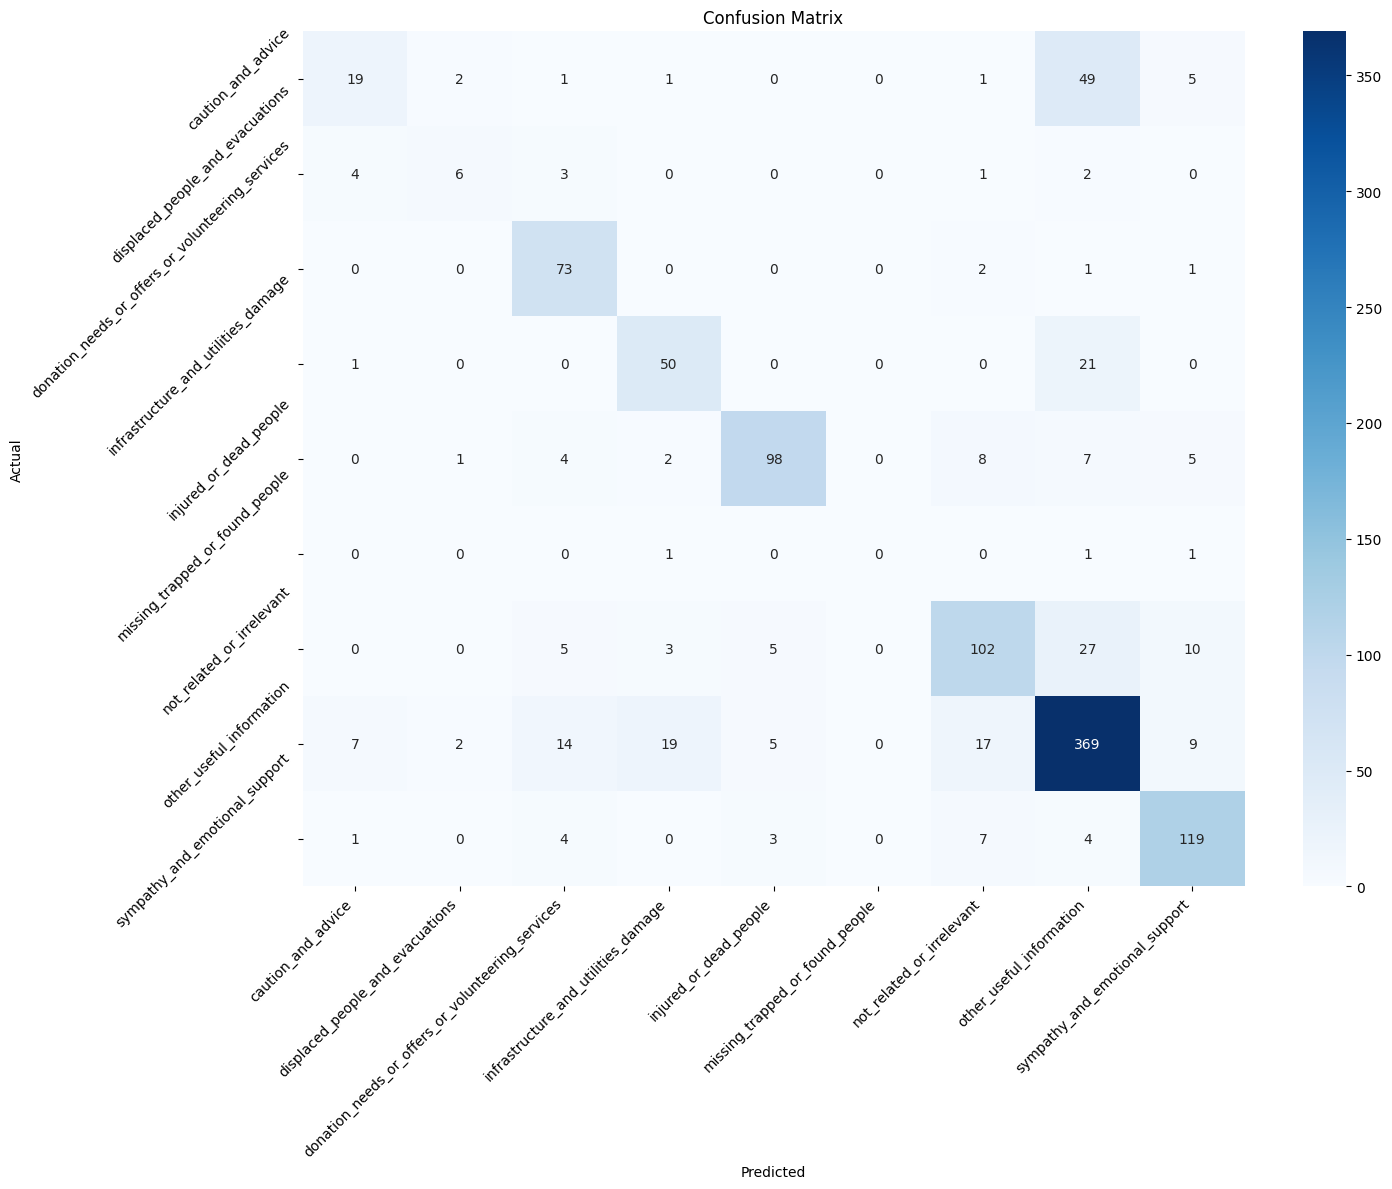


Classification Report:
                                                   precision    recall  f1-score   support

                               caution_and_advice       0.59      0.24      0.35        78
                 displaced_people_and_evacuations       0.55      0.38      0.44        16
donation_needs_or_offers_or_volunteering_services       0.70      0.95      0.81        77
              infrastructure_and_utilities_damage       0.66      0.69      0.68        72
                           injured_or_dead_people       0.88      0.78      0.83       125
                  missing_trapped_or_found_people       0.00      0.00      0.00         3
                        not_related_or_irrelevant       0.74      0.67      0.70       152
                         other_useful_information       0.77      0.83      0.80       442
                   sympathy_and_emotional_support       0.79      0.86      0.83       138

                                         accuracy               

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter


class CrisisDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_len):
        self.texts = texts
        self.labels = labels
        print("\nDataset initialization:")
        print("Labels type:", type(self.labels))
        print("First few labels:", self.labels[:5])
        self.vocab = vocab
        self.max_len = max_len
        self.oov_char = len(vocab)

    def __len__(self):
        return len(self.texts)

    def numberize_text(self, text):
        words = str(text).lower().split()
        indices = [self.vocab.get(word, self.oov_char) for word in words]

        if len(indices) < self.max_len:
            indices = indices + [self.oov_char] * (self.max_len - len(indices))
        else:
            indices = indices[:self.max_len]

        return indices

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        indices = self.numberize_text(text)
        try:
            return torch.tensor(indices, dtype=torch.long), torch.tensor(int(label), dtype=torch.long)
        except Exception as e:
            print(f"Error at index {idx}")
            print(f"Label causing error: {label}")
            print(f"Label type: {type(label)}")
            raise e

class CrisisCNN(nn.Module):
    def __init__(self, pretrained_embeddings, n_filters=100, filter_sizes=[2,4,6,8],
                 output_dim=9, dropout=0.5):
        super().__init__()

        # Add one extra row for OOV
        pad_embedding = torch.zeros(1, pretrained_embeddings.size(1))
        self.embedding_matrix = torch.cat([pretrained_embeddings, pad_embedding])

        self.embedding = nn.Embedding.from_pretrained(self.embedding_matrix,
                                                    padding_idx=self.embedding_matrix.size(0)-1,
                                                    freeze=False)

        embedding_dim = pretrained_embeddings.size(1)

        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1,
                     out_channels=n_filters,
                     kernel_size=(fs, embedding_dim))
            for fs in filter_sizes
        ])


        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        embedded = embedded.unsqueeze(1)

        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]

        cat = self.dropout(torch.cat(pooled, dim=1))
        return self.fc(cat)


def train_model(model, train_loader, valid_loader, criterion, optimizer, n_epochs, device):
    best_valid_loss = float('inf')

    # Save first batch for monitoring across epochs
    first_batch = None
    first_batch_labels = None
    for texts, labels in train_loader:
        first_batch = texts.clone()
        first_batch_labels = labels.clone()
        break

    first_batch = first_batch.to(device)
    first_batch_labels = first_batch_labels.to(device)

    for epoch in range(n_epochs):
        print(f'\nEpoch {epoch+1}/{n_epochs}')

        # Training phase
        model.train()
        total_train_loss = 0
        batch_losses = []

        # Check performance on first batch at start of epoch
        with torch.no_grad():
            first_batch_preds = model(first_batch)
            first_batch_loss = criterion(first_batch_preds, first_batch_labels)
            _, predicted = torch.max(first_batch_preds, 1)
            first_batch_acc = (predicted == first_batch_labels).float().mean()
            print(f"\nFirst batch performance at epoch start:")
            print(f"Loss: {first_batch_loss:.4f}")
            print(f"Accuracy: {first_batch_acc*100:.2f}%")

        progress_bar = tqdm(train_loader, desc='Training')
        for batch_idx, (texts, labels) in enumerate(progress_bar):
            texts, labels = texts.to(device), labels.to(device)

            optimizer.zero_grad()
            predictions = model(texts)
            loss = criterion(predictions, labels)

            # Monitor predictions every 100 batches
            if batch_idx % 100 == 0:
                with torch.no_grad():
                    pred_probs = F.softmax(predictions, dim=1)
                    print(f"\nBatch {batch_idx}")
                    print(f"Prediction distribution - min: {pred_probs.min():.4f}, max: {pred_probs.max():.4f}")
                    print(f"Mean prediction per class: {pred_probs.mean(dim=0).cpu().numpy()}")

            loss.backward()

            # Add gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()

            batch_losses.append(loss.item())
            total_train_loss += loss.item()

            # Show recent loss trend
            recent_loss = sum(batch_losses[-10:]) / min(len(batch_losses), 10)
            progress_bar.set_postfix({
                'current_loss': f'{loss.item():.3f}',
                'avg_loss': f'{total_train_loss/(batch_idx+1):.3f}',
                'recent_loss': f'{recent_loss:.3f}'
            })

        # Validation phase
        model.eval()
        total_valid_loss = 0
        correct = 0
        total = 0

        val_progress = tqdm(valid_loader, desc='Validation')
        with torch.no_grad():
            for texts, labels in val_progress:
                texts, labels = texts.to(device), labels.to(device)
                predictions = model(texts)
                loss = criterion(predictions, labels)
                total_valid_loss += loss.item()

                _, predicted = torch.max(predictions, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_train_loss = total_train_loss/len(train_loader)
        avg_valid_loss = total_valid_loss/len(valid_loader)
        accuracy = 100 * correct/total

        print(f'\nEpoch {epoch+1} Summary:')
        print(f'Average Train Loss: {avg_train_loss:.3f}')
        print(f'Average Valid Loss: {avg_valid_loss:.3f}')
        print(f'Valid Accuracy: {accuracy:.2f}%')

        # Check first batch again at end of epoch
        with torch.no_grad():
            first_batch_preds = model(first_batch)
            first_batch_loss = criterion(first_batch_preds, first_batch_labels)
            _, predicted = torch.max(first_batch_preds, 1)
            first_batch_acc = (predicted == first_batch_labels).float().mean()
            print(f"\nFirst batch performance at epoch end:")
            print(f"Loss: {first_batch_loss:.4f}")
            print(f"Accuracy: {first_batch_acc*100:.2f}%")

        if avg_valid_loss < best_valid_loss:
            best_valid_loss = avg_valid_loss
            torch.save(model.state_dict(), 'best_model.pt')
            print("Saved new best model!")

    model.load_state_dict(torch.load('best_model.pt'))
    return model


from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

def evaluate_model(model, test_loader, device, idx_to_label):
    model.eval()
    all_predictions = []
    all_labels = []
    all_prediction_probs = []  # Store probability predictions

    print("\nEvaluating model...")
    with torch.no_grad():
        for texts, labels in tqdm(test_loader, desc='Testing'):
            texts, labels = texts.to(device), labels.to(device)
            predictions = model(texts)
            probs = F.softmax(predictions, dim=1)  # Get probabilities
            _, predicted = torch.max(predictions, 1)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_prediction_probs.extend(probs.cpu().numpy())

    # Convert to numpy arrays
    all_labels = np.array(all_labels)
    all_prediction_probs = np.array(all_prediction_probs)

    # Get label names
    label_names = [idx_to_label[idx] for idx in range(len(idx_to_label))]
    n_classes = len(label_names)

    # Binarize labels for ROC AUC calculation
    binary_labels = label_binarize(all_labels, classes=range(n_classes))

    # Compute ROC AUC for each class
    roc_auc = {}
    pr_auc = {}

    print("\nROC-AUC Scores per class:")
    for i in range(n_classes):
        try:
            roc_auc[label_names[i]] = roc_auc_score(binary_labels[:, i], all_prediction_probs[:, i])

            # Calculate PR AUC
            precision, recall, _ = precision_recall_curve(binary_labels[:, i], all_prediction_probs[:, i])
            pr_auc[label_names[i]] = auc(recall, precision)

            print(f"{label_names[i]}:")
            print(f"  ROC-AUC: {roc_auc[label_names[i]]:.3f}")
            print(f"  PR-AUC:  {pr_auc[label_names[i]]:.3f}")
        except Exception as e:
            print(f"Error calculating AUC for class {label_names[i]}: {str(e)}")

    # Calculate macro average ROC-AUC
    macro_roc_auc = np.mean(list(roc_auc.values()))
    macro_pr_auc = np.mean(list(pr_auc.values()))

    print(f"\nMacro Average ROC-AUC: {macro_roc_auc:.3f}")
    print(f"Macro Average PR-AUC: {macro_pr_auc:.3f}")

    # Original confusion matrix and classification report
    cm = confusion_matrix(all_labels, all_predictions)
    plt.figure(figsize=(15,12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_names,
                yticklabels=label_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("\nClassification Report:")
    print(classification_report(all_labels, all_predictions,
                              target_names=label_names))

    return {
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'macro_roc_auc': macro_roc_auc,
        'macro_pr_auc': macro_pr_auc
    }

def main(vocab, pretrained_embeddings):
    # Prepare data
    texts = eq['tweet_text'].values
    labels = eq['label_idx'].values

    # Split data first
    X_train, X_valid, y_train, y_valid = train_test_split(texts, labels,
                                                         test_size=0.2,
                                                         random_state=42,
                                                         stratify=labels)

    # Print original distribution
    print("\nOriginal class distribution:")
    print(Counter(y_train))

    # Prepare data for SMOTE
    print("\nPreparing data for SMOTE...")
    vectorized_texts = []
    for text in X_train:
        indices = [vocab.get(word, len(vocab)) for word in str(text).lower().split()]
        if len(indices) < 100:
            indices = indices + [len(vocab)] * (100 - len(indices))
        else:
            indices = indices[:100]
        vectorized_texts.append(indices)

    # Convert to numpy array
    X_train_array = np.array(vectorized_texts)

    # Apply SMOTE
    print("\nApplying SMOTE...")
    smote = SMOTE(sampling_strategy={0: 500, 1: 100, 2: 500, 3: 500, 4: 500, 5: 50, 6: 608, 7: 1769, 8: 552}, k_neighbors=1, random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_array, y_train)
    print("\nResampled class distribution:")
    print(Counter(y_train_smote))

    # Convert back to text format
    X_train_resampled = list(X_train)  # Convert to list for appending
    additional_indices = range(len(X_train), len(X_train_smote))
    for idx in additional_indices:
        neighbor_idx = smote.nn_k_.kneighbors(X_train_smote[idx].reshape(1, -1),
                                             n_neighbors=1,
                                             return_distance=False)[0][0]
        if neighbor_idx < len(X_train):
            X_train_resampled.append(X_train[neighbor_idx])
        else:
            X_train_resampled.append(X_train_resampled[neighbor_idx-len(X_train)])

    # Create datasets
    MAX_LENGTH = 20
    train_dataset = CrisisDataset(X_train_resampled, y_train_smote, vocab, MAX_LENGTH)
    valid_dataset = CrisisDataset(X_valid, y_valid, vocab, MAX_LENGTH)

    # Rest stays the same
    BATCH_SIZE = 32
    N_EPOCHS = 5
    LEARNING_RATE = 0.001

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    model = CrisisCNN(pretrained_embeddings, output_dim=len(unique_labels)).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

    print("\nStarting training...")
    train_model(model, train_loader, valid_loader, criterion, optimizer, N_EPOCHS, device)

    print("\nEvaluating final model:")
    evaluate_model(model, valid_loader, device, idx_to_label)

    return model, vocab


# Train the model
print("Starting main process...")
model, vocab = main(vocab, pretrained_embeddings)